# Présentation

Ce notebook contient les consignes ainsi que des emplacements vides pour apporter les réponses aux questions posées.

Ne changez pas les noms de variable qui vous sont proposées.




# Echauffement

## Création DataFrame à partir de 0

A partir d'une base de données SQLite3 dont le code python est présent ci-dessous, nous allons recréer un dataframe manuellement basée sur les mêmes données. En seconde partie, nous verrons comment convertir un résultat de requêtes SQL directement en dataframe

```csv
fruit,origin,quantity
apple,france,12
apple,germany,78
apple,france,19
orange,france,10
orange,germany,98
strawberry,spain,2
```

la requête SQL pour créer la table contenant ces données

```sql
CREATE TABLE basket(fruit text, origin text, quantity int)
```


In [5]:
import pandas as pd
df = pd.DataFrame(
    {
        "fruit": [
            "apple",
            "apple",
            "apple",
            "orange",
            "orange",
            "strawberry"
        ],
        "origin": ["france", "germany", "france","france","germany","spain"],
        "quantity": [12, 78, 19,10,98,2],
    }
)
df

,fruit,origin,quantity
0,apple,france,12
1,apple,germany,78
2,apple,france,19
3,orange,france,10
4,orange,germany,98
5,strawberry,spain,2


Créer une série représentant la colonne `fruit` en utilisant le constructeur [`pd.Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

In [6]:
fruit = pd.Series(df['fruit'])
fruit

0         apple
1         apple
2         apple
3        orange
4        orange
5    strawberry
Name: fruit, dtype: object

Créer une série représentant la colonne `origin` en utilisant le constructeur [`pd.Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

In [7]:
origin = pd.Series(df['origin'])

Créer une série représentant la colonne `quantity` en utilisant le constructeur [`pd.Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

In [8]:
quantity = pd.Series(df['quantity'])

Créer un dataframe composé de ces 3 séries créées précédemment grâce au constructeur [`pd.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame)

In [9]:
basket = {'fruit': fruit,
         'origin': origin,
         'quantity':quantity
         }
basket = pd.DataFrame(basket)
basket
## a revoir

,fruit,origin,quantity
0,apple,france,12
1,apple,germany,78
2,apple,france,19
3,orange,france,10
4,orange,germany,98
5,strawberry,spain,2


## Création DataFrame à partir d'un fichier CSV

Vous obtenez une seconde série de données, via un fichier CSV cette fois-ci. Vous pouvez donc lire le fichier CSV directement via la méthode `read_csv`.

Ce fichier CSV contient les informations suivantes

```csv
fruit,origin,quantity
kiwi,uk,12
kiwi,new zealand,78
pineapple,france,19
blueberry,canada,10
blueberry,canada,98
strawberry,spain,2
```

In [10]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/")
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("read.csv",sep=';')
basketTom = df
basketTom

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,fruit,origin,quantity
0,kiwi,uk,12
1,kiwi,new zealand,78
2,pineapple,france,19
3,blueberry,canada,10
4,blueberry,canada,98
5,strawberry,spain,2


Combiner les dataframes basket et basketTom en un nouveau dataframe basketFull

In [11]:
basketFull = pd.concat([basket, basketTom],ignore_index=True)
basketFull

,fruit,origin,quantity
0,apple,france,12
1,apple,germany,78
2,apple,france,19
3,orange,france,10
4,orange,germany,98
5,strawberry,spain,2
6,kiwi,uk,12
7,kiwi,new zealand,78
8,pineapple,france,19
9,blueberry,canada,10


## Requêtes sur le DataFrame
Pour répondre à chacune des questions, proposer une requête sur le dataframe `basketFull`. Attention à ne jamais modifier le dataframe `basketFull`.

Quelle est la quantité max envoyée par pays d'origine tous fruits confondus ?

In [12]:
#fruits par pays
basketFull_max_quantite = basketFull.groupby(['quantity', 'origin']).max()
del basketFull_max_quantite['fruit']
basketFull_max_quantite

Empty DataFrame
Columns: []
Index: [(2, spain), (10, canada), (10, france), (12, france), (12, uk), (19, france), (78, germany), (78, new zealand), (98, canada), (98, germany)]

Quelle est la quantité max reçue par fruit et par pays d'origine ?

In [13]:
#fruits par pays d'origine
basketFull_max_recus = basketFull.groupby(['quantity', 'origin']).max()
del basketFull_max_recus['fruit']
basketFull_max_recus

Empty DataFrame
Columns: []
Index: [(2, spain), (10, canada), (10, france), (12, france), (12, uk), (19, france), (78, germany), (78, new zealand), (98, canada), (98, germany)]

Quelle est la quantité totale de fruits reçus par fruit ?

In [14]:
basketFull_max_quantite = basketFull.groupby(['fruit']).sum()
basketFull_max_quantite

<ipython-input-14-dca96882d904>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  basketFull_max_quantite = basketFull.groupby(['fruit']).sum()


,quantity
fruit,
apple,109
blueberry,108
kiwi,90
orange,108
pineapple,19
strawberry,4


Afficher dans un graphique de barres empilées la quantité de fruits par origine.

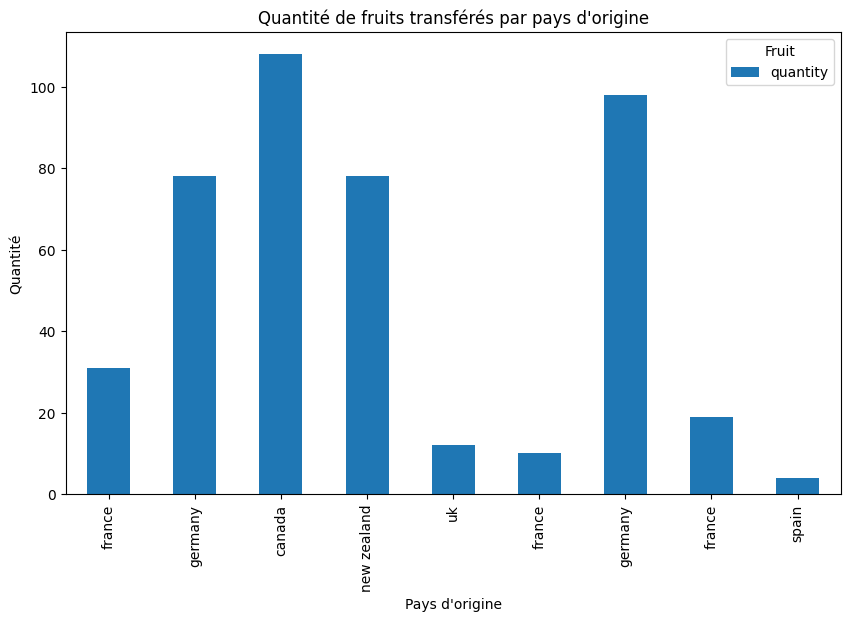

In [15]:
result = basketFull.groupby(['fruit', 'origin']).sum().reset_index()
result.plot(kind='bar', x='origin', y='quantity', stacked=True, figsize=(10, 6))
plt.xlabel('Pays d\'origine')
plt.ylabel('Quantité')
plt.title('Quantité de fruits transférés par pays d\'origine')
plt.legend(title='Fruit')
plt.show()


# Transactions immobilières

Pour cette seconde partie, nous repartons sur la collecte des transactions immobilières et nous allons tenter d'identifier les caractéristiques les plus pertinentes.

Télécharger le [fichier des transactions immobilières](https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20230405-160733/valeursfoncieres-2022.txt)

Créer un premier dataframe qui ne va conserver que les transactions relatives à Charleville-Mézières.

Modifier le dataframe pour convertir les montants en k€.

Conserver dans le dataframe uniquement les colonnes utiles :
- No voie
- Type de voie
- Code voie
- Voie
- Code postal
- Commune
- Code departement
- Code commune
- Valuer fonciere
- Nombre pieces principales
- Surface Carrez du 1er lot

Grâce l'[API Adresse](https://adresse.data.gouv.fr/api-doc/adresse), envoyer votre fichier d'adresse pour récupérer les coordonnées GPS correspondantes

Construire un nouveau dataframe contenant uniquement latitude, longitude, valeur foncière, surface et nbre de pièces


Afficher un 1er graphique x = latitude, y = longitude et la couleur correspondant au prix sous forme de scatter.

Indiquer quelle est la valeur de la transaction immobilière la plus importante.

Où se situe le centre géographique de toutes les transactions enregistrées ?


In [18]:
import pandas as pd
import requests


df2 = pd.read_csv("valeursfoncieres-2022.txt", delimiter='|')
df2 = df2[['No voie', 'Type de voie', 'Code voie', 'Voie', 'Code postal', 'Commune', 'Code departement', 'Code commune', 'Valeur fonciere', 'Nombre pieces principales', 'Surface Carrez du 1er lot']]


nom_fichier_csv = 'mon_dataframe.csv'

df2.to_csv(nom_fichier_csv, index=False)

<ipython-input-18-5e68f4444dce>:5: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("valeursfoncieres-2022.txt", delimiter='|')


,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Valeur fonciere,Nombre pieces principales,Surface Carrez du 1er lot
0,13.0,RUE,2280,DE LA LIBERTE,1000.0,BOURG-EN-BRESSE,1,53,"55000,00",1.0,"24,10"
1,NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,398,"143000,00",NaN,NaN
2,NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,398,"143000,00",NaN,NaN
3,98.0,RTE,0055,DE LA DOMBES,1480.0,SAVIGNEUX,1,398,"143000,00",3.0,"123,23"
4,NaN,NaN,B031,AUX PIERRES,1480.0,MESSIMY SUR SAONE,1,243,"300,00",NaN,NaN


In [17]:
df2 = df2[['No voie', 'Type de voie', 'Code voie', 'Voie', 'Code postal', 'Commune', 'Code departement', 'Code commune', 'Valeur fonciere', 'Nombre pieces principales', 'Surface Carrez du 1er lot']]
df2.head()

,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Valeur fonciere,Nombre pieces principales,Surface Carrez du 1er lot
0,13.0,RUE,2280,DE LA LIBERTE,1000.0,BOURG-EN-BRESSE,1,53,"55000,00",1.0,"24,10"
1,NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,398,"143000,00",NaN,NaN
2,NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,398,"143000,00",NaN,NaN
3,98.0,RTE,0055,DE LA DOMBES,1480.0,SAVIGNEUX,1,398,"143000,00",3.0,"123,23"
4,NaN,NaN,B031,AUX PIERRES,1480.0,MESSIMY SUR SAONE,1,243,"300,00",NaN,NaN
